Build the linear regression model using scikit learn in boston data to predict 
'Price' based on other dependent variable.

In [148]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data,columns=boston.feature_names)

In [149]:
data['MEDV'] = boston.target

In [150]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [151]:
data.head().isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [152]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [154]:
data.drop(['CHAS','ZN'],axis=1,inplace=True)

In [155]:
data.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [156]:
import seaborn as sns

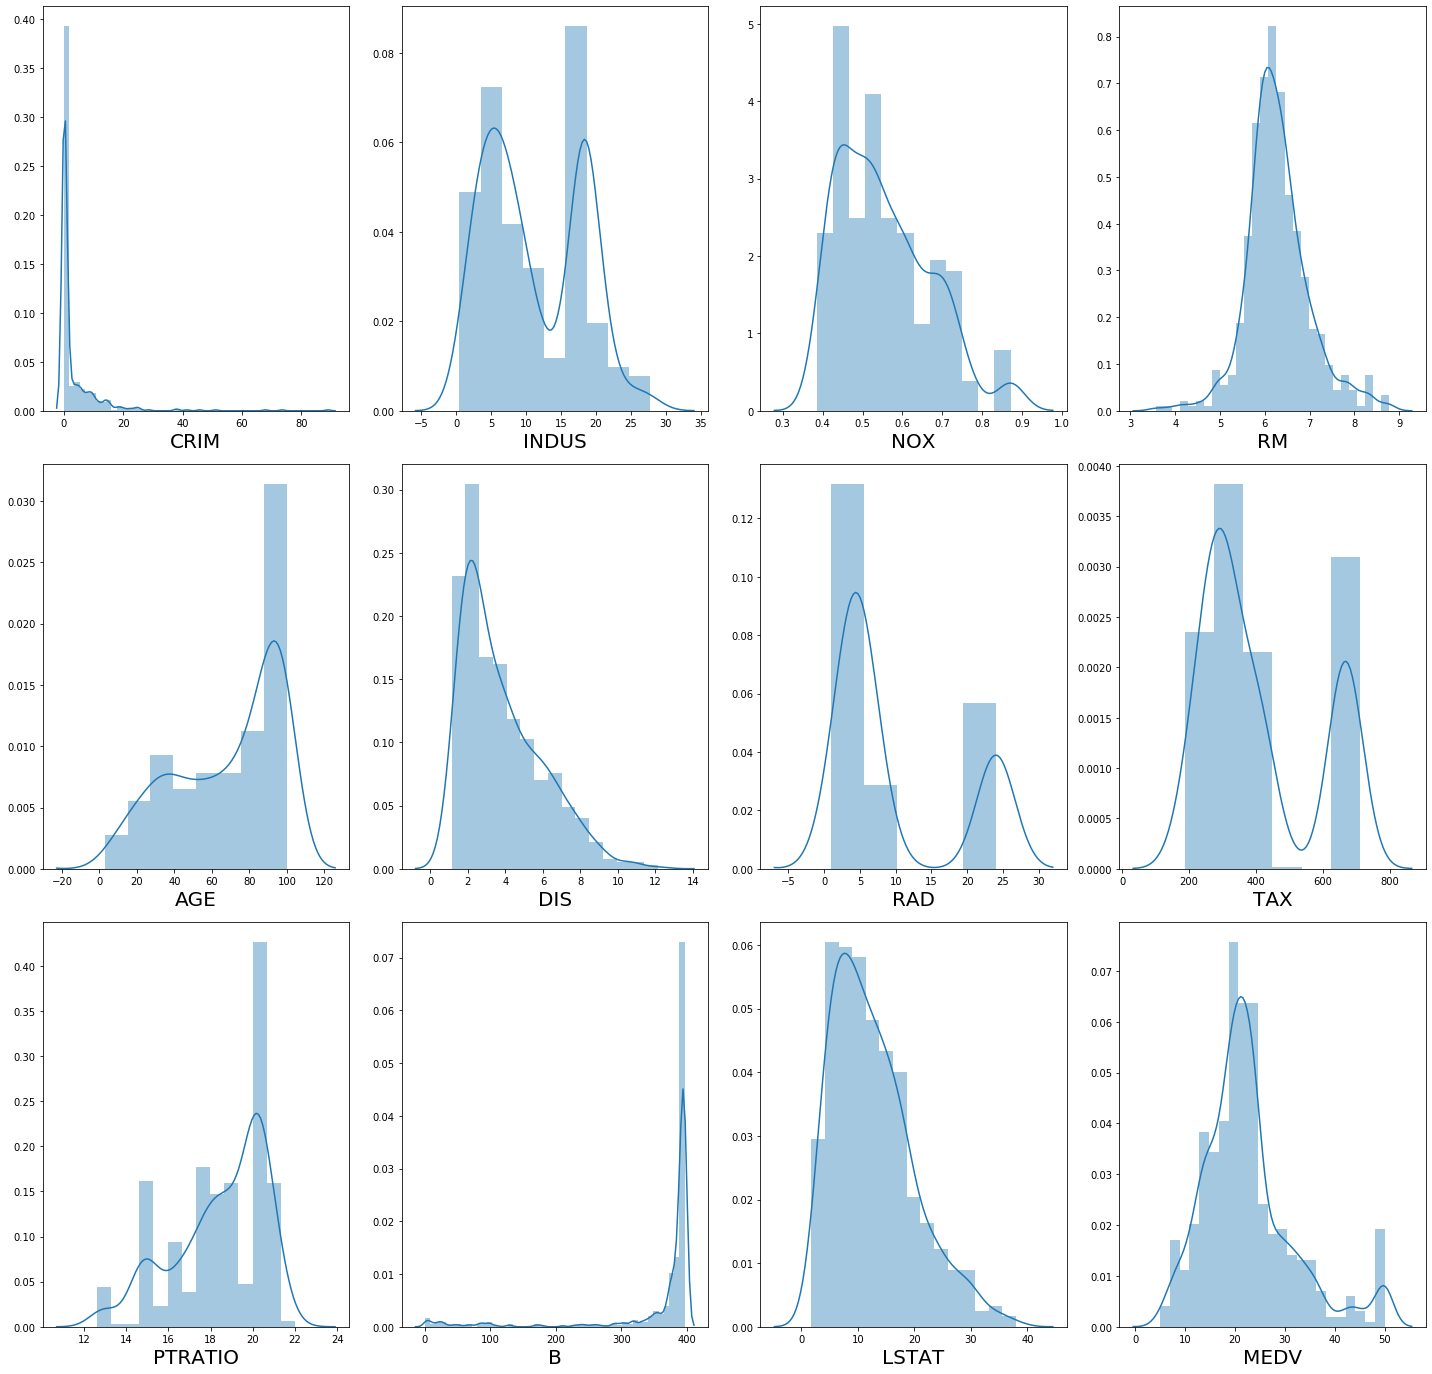

In [157]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [158]:
data['CRIM'] = np.log(data['CRIM'])
data['DIS'] = np.log(data['DIS'])


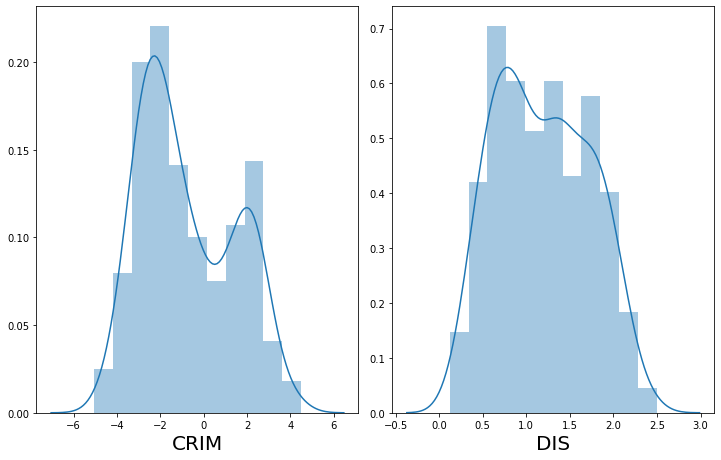

In [159]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
column = ['CRIM','DIS']
for p in column:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[p])
        plt.xlabel(p,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [160]:
y = data['MEDV']
X =data.drop(columns = ['MEDV'])

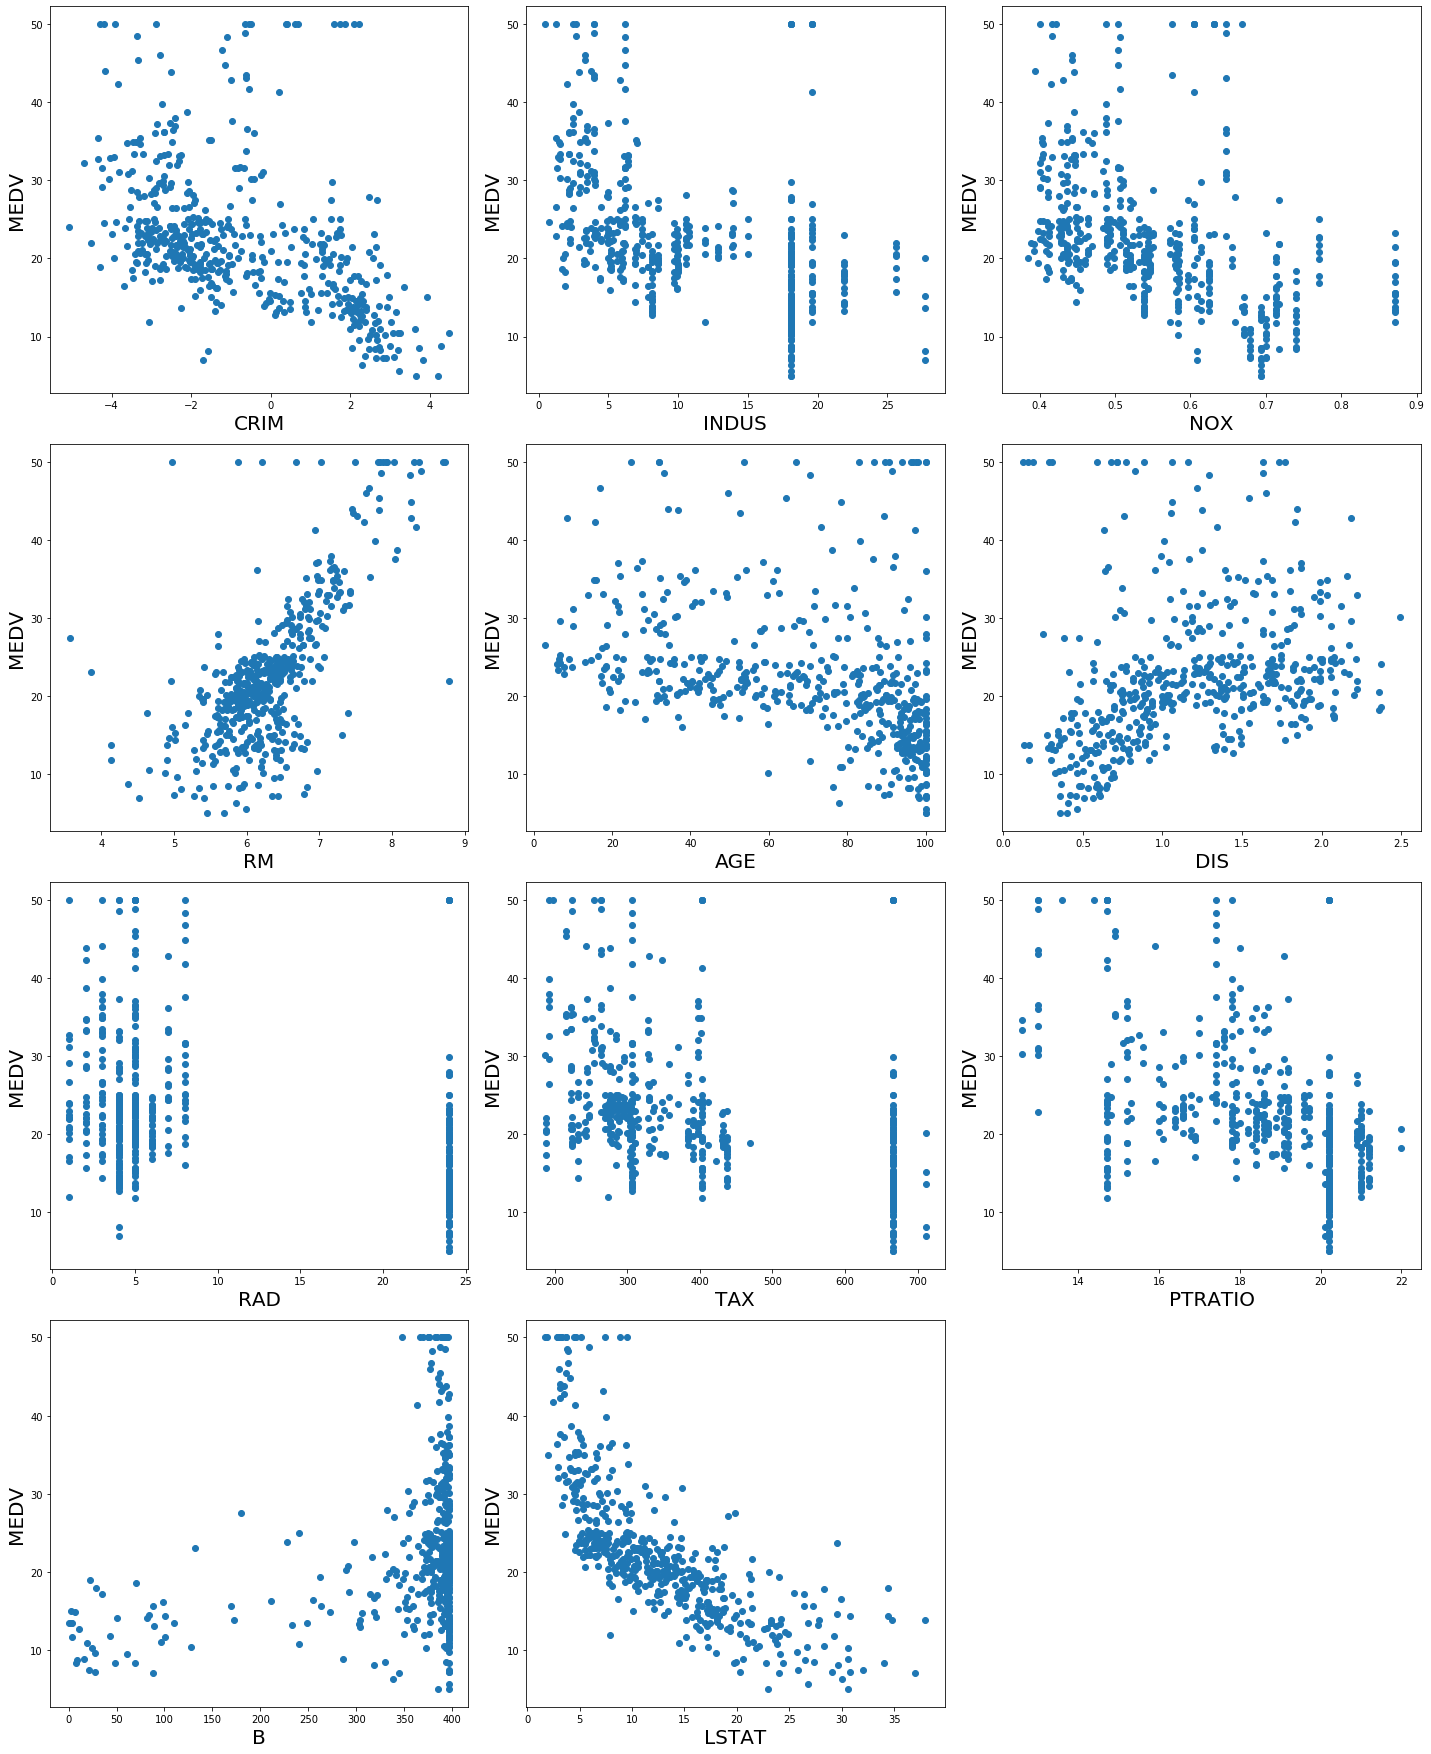

In [161]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('MEDV',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [162]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = X.columns

In [164]:
vif

,VIF,Features
0,7.615445,CRIM
1,3.950898,INDUS
2,4.914813,NOX
3,1.881043,RM
4,3.163781,AGE
5,4.613605,DIS
6,9.602754,RAD
7,8.365079,TAX
8,1.606003,PTRATIO
9,1.353871,B


In [165]:
data.drop(['RAD'],axis=1,inplace=True)

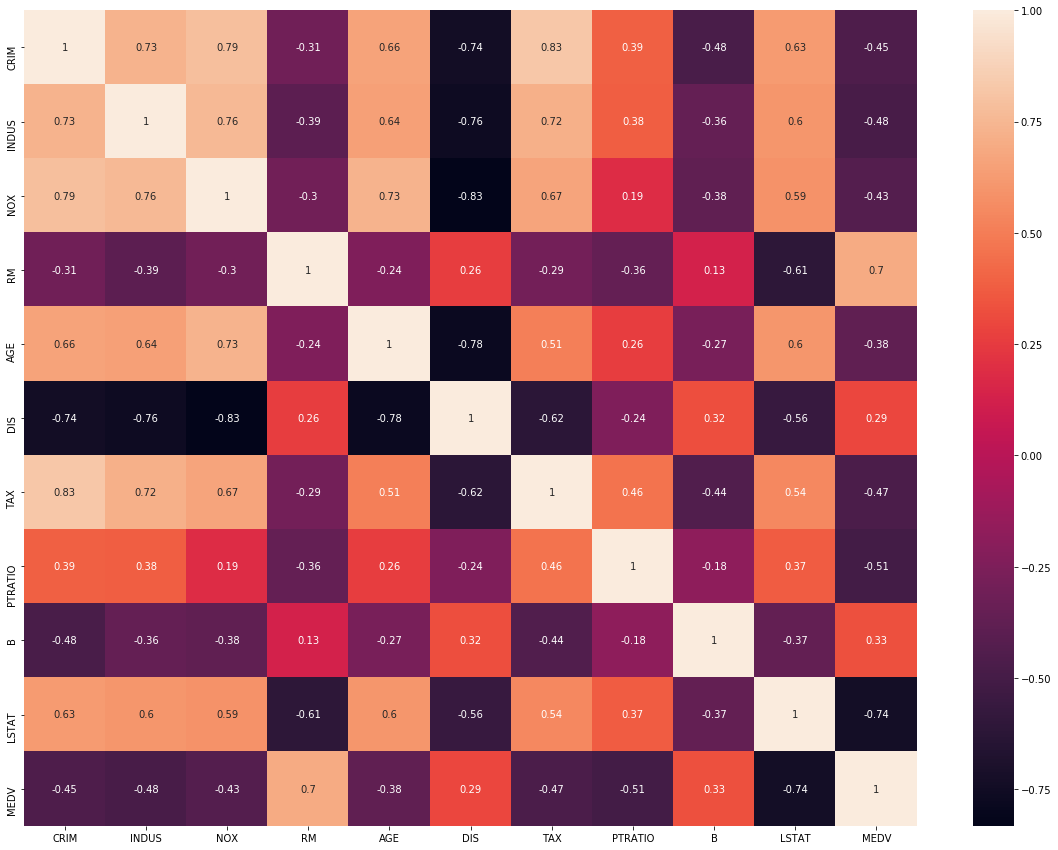

In [166]:
import seaborn as sns
correlation_matrix = data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(data=correlation_matrix, annot=True)

In [167]:
data.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,-5.064036,2.31,0.538,6.575,65.2,1.408545,296.0,15.3,396.90,4.98,24.0
1,-3.600502,7.07,0.469,6.421,78.9,1.602836,242.0,17.8,396.90,9.14,21.6
2,-3.601235,7.07,0.469,7.185,61.1,1.602836,242.0,17.8,392.83,4.03,34.7
3,-3.430523,2.18,0.458,6.998,45.8,1.802073,222.0,18.7,394.63,2.94,33.4
4,-2.672924,2.18,0.458,7.147,54.2,1.802073,222.0,18.7,396.90,5.33,36.2


In [168]:
lm = smf.ols(formula='MEDV ~ INDUS + NOX + RM + DIS + LSTAT + PTRATIO', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sun, 06 Jun 2021   Prob (F-statistic):          2.87e-136
Time:                        11:43:17   Log-Likelihood:                -1513.9
No. Observations:                 506   AIC:                             3042.
Df Residuals:                     499   BIC:                             3071.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.7357      4.769      9.591      0.000      36.367      55.105
INDUS         -0.1016      0.057     -1.790      0.074      -0.213       0.010
NOX          -23.5237      3.729     -6.308      0.000     -30.850     -16.197
RM             4.0456      0.403     10.051      0.000       3.255       4.836
DIS           -7.0351      0.781     -9.006      0.000      -8.570      -5.500
LSTAT         -0.6074      0.047    -12.888      0.000      -0.700      -0.515
PTRATIO       -0.9972      0.114     -8.715      0.000      -1.222      -0.772
==============================================================================
Omnibus:                      124.562   Durbin-Watson:                   1.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.118
Skew:                           1.127   Prob(JB):                     3.94e-89
Kurtosis:                       6.772   Cond. No.                         670.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=21)

In [170]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:

regression.score(x_train,y_train)


0.7479014396465052

In [172]:
regression.score(x_test,y_test)

0.7123009303436219

In [173]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [174]:
elasticCV.alpha_

0.013577642933305238

In [175]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.013577642933305238, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [176]:
elasticnet_reg.score(x_test, y_test)

0.7148218898526901